# MUON BEAM DUMP -- All Models


This notebook is to specifically make plots for our models of interest for our paper, `XXXX.XXXX`. For the generic muon beam dump code, see `muon_beam_dump.ipynb`. 

In [137]:
import numpy as np
from event_yields import calculate_event_yields


Parameters

Global Parameters

In [138]:
from config import build_cross_section_config
from config import build_full_config

# Stuff
force_rerun = True # Usually keep True, can turn False if only making cosmetic changes
E_0s = [10, 63, 1500, 5000]
targets = ["Water", "Lead"]

target_lengths_water = {10: 4, 63: 10, 1500: 10, 5000: 10}
target_lengths_lead = {10: 0.5, 63: 2, 1500: 5, 5000: 5}

l_T = {"Water" : target_lengths_water, "Lead" :  target_lengths_lead}
Zs = {"Water" : 10, "Lead" : 82}
As = {"Water" : 18.02, "Lead" : 207.2}
rhos = {"Water" : 1.0, "Lead" : 11.35}

# Beam Parameters
m_lepton = 0.105    # Colliding lepton mass [GeV] # DO NOT CHANGE
N_mu = 1e20         # Total number of muons on target

# Dump Parameters
theta_max = 1e-2                # Maximum allowed emission angle [rad] # DO NOT CHANGE
shield_length = 10          # Length of shield [m]
detector_length = 100       # Length of detector [m]

# Constants
alpha = 1/137
electron_charge = np.sqrt(4 * np.pi * alpha)



# Calculation parameters
xbins = 1000                    
m_Xs = np.logspace(-3, 3, 25)       # Range of X masses to compute for interpolation


run_muonphilic = True
run_lmu_minus_ltau = True
run_leptophilic = True
run_dark_photon = True
run_yukawa = True


# Generic Plot Code

Generalized function to build contour plots

In [147]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os




# function to load the event counts dictionary from the default directory
def load_events_dict(config):

    experiment_name_string_ = f"experiments/{config['Target Name']}/experiment_{config['Model String']}_e{config['E_0']}_t{config['Target Length']}_s{config['Shield Length']}_d{config['Detector Length']}"
    return np.load(f"{experiment_name_string_}/event_counts.npy", allow_pickle=True)[()]



# Function to generate exclusion contour plot
def exclusion_plot(config, case, model_name,  levels, cmap, labels, newfig = True, show = True, scale_factor = 1, nan_value = -30, epsilon_vs_g = True, font_size = 20, font_family = "serif", font_set = "cm", y_string = None):

    use_boring_colors =  False

    # Load config
    model_name_string=config["Model String"]
    plot_mrange = config["m_range"]
    plot_erange = config["e_range"]
    target_name = config["Target Name"]
    target_length = config["Target Length"]
    shield_length = config["Shield Length"]
    detector_length = config["Detector Length"]
    E = config["E_0"]

    m_X_linspace = np.logspace(plot_mrange[0], plot_mrange[1], 100)
    epsilon_linspace = np.logspace(plot_erange[0], plot_erange[1], 100) * scale_factor
    if not epsilon_vs_g:
        epsilon_linspace = epsilon_linspace * electron_charge
    Mlin, Elin = np.meshgrid(m_X_linspace, epsilon_linspace)


    if newfig:
        fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))

    plt.xscale("log")
    plt.yscale("log")

    # Font Shenanigans
    mpl.rcParams['font.family']=font_family
    mpl.rcParams['mathtext.fontset']=font_set
    plt.rcParams.update({'font.size': font_size})
    plt.rcParams['axes.formatter.min_exponent'] = 1

    # Load events
    events = load_events_dict(config)[case] 
    white_events = np.log10(events)
    white_events[white_events  < -3 ] = np.NaN
    white_events = np.nan_to_num(white_events, nan = nan_value)



    # Make Contours
    if use_boring_colors:
        plt.contourf(Mlin, Elin, white_events, levels = levels, cmap =  cmap, alpha = 0.75, extend = "max", lw = 5)
        contours = plt.contour(Mlin, Elin, white_events, levels = levels, cmap = cmap, lw = 5)
    else:
        cm = mpl.cm.get_cmap(cmap)
        colors = [cm(0.25), cm(0.5), cm(0.75)]
        print(colors)
        plt.contourf(Mlin, Elin, white_events, levels = levels, colors = colors, alpha = 0.75, extend = "max", lw = 5)
        contours = plt.contour(Mlin, Elin, white_events, levels = levels, colors = colors, lw = 5)
    
    fmt = {}
    for l, label in zip(contours.levels, labels):
        fmt[l] = label
    # clabels = plt.clabel(contours, inline=True, levels=levels, fmt = fmt, colors = "black", rightside_up = True)
    # for label in clabels:
    #     label.set_va("bottom")
    



    plt.xlabel("$m_X$ [GeV]", fontsize = 26)
    plt.ylabel("$\epsilon$", fontsize = 26)
    if not epsilon_vs_g:
        plt.ylabel("$g$", fontsize = 26)
    if y_string is not None:
        plt.ylabel(y_string, fontsize = 26)

    # Axis ranges
    plt.xlim(pow10(plot_mrange))
    plt.ylim(pow10(plot_erange)*  scale_factor)

    # plt.text(0.05, 0.99 - 0.05*1, r"Muon Beam Dump", fontsize = 20, transform = plt.gca().transAxes)
    plt.text(0.05, 0.99 - 0.05*2, r"$E_0 = %d$ GeV" % E, fontsize = 23, transform = plt.gca().transAxes)
    plt.text(0.05, 0.99 - 0.05*1, f"{target_name} Target", fontsize = 23, transform = plt.gca().transAxes)
    
    plt.text(0.65, 0.99 - 0.05*1, r"$L_{tar} = %.1f$ m" % target_length, fontsize = 24, transform = plt.gca().transAxes, ha = 'left')
    plt.text(0.65, 0.99 - 0.05*2, r"$L_{sh} = %.1f$ m" % shield_length, fontsize = 24, transform = plt.gca().transAxes, ha = 'left')
    plt.text(0.65, 0.99 - 0.05*3, r"$L_{dec} = %.1f$ m" % detector_length, fontsize = 24, transform = plt.gca().transAxes, ha = 'left')
    plt.text(0.65, 0.99 - 0.05*4, r"$\theta_{max} = 10^{-2}$", fontsize = 24, transform = plt.gca().transAxes, ha = 'left')

    plt.text(0.99, 0.01, model_name, fontsize = 24, transform = plt.gca().transAxes, ha = "right", va = "bottom")

    # plt.savefig(f"tex/Figures/exclusions_{case}_{E_0}.pdf", transparent = False)


    plt.savefig(f"{config['Experiment Directory']}/exclusions_{case}.pdf", transparent = False)
    os.makedirs(f"tex/Figures/Exclusions/{model_name_string}/{config['Target Name']}/", exist_ok=True)
    plt.savefig(f"tex/Figures/Exclusions/{model_name_string}/{config['Target Name']}/exclusions_{case}_e{E}.pdf", transparent = False)
    if show:
        plt.show()


# Function to load in txt/csv
def read_digitized(filename, col1_function = None, col2_function = None, firstrow = 0, lastrow = None, delimiter = None, usecols = None):


    if lastrow is not None:
        max_rows = lastrow - firstrow
    else:
        max_rows = None

    try:
        arr = np.loadtxt(filename, delimiter = delimiter, skiprows=firstrow, usecols = usecols, max_rows=max_rows)
    except(ValueError):
        arr = np.loadtxt(filename, delimiter = ",", skiprows=firstrow, usecols = usecols, max_rows=max_rows)
    if col1_function is not None:
        arr[:,0] = col1_function(arr[:,0])
    if col2_function is not None:
        arr[:,1] = col2_function(arr[:,1])

    return arr

def MeV_to_GeV(x):
    return x / 1000.0

def pow10(x):
    return np.power(10.0, x)



def plot_grey(ax, config, data):

    # Load config
    plot_mrange = config["m_range"]
    plot_erange = config["e_range"]

    ax.fill_between(data[:,0], data[:,1], pow10(plot_erange[1]), color = (0.9, 0.9, 0.9), zorder = 1)

def plot_projection(ax, config, data, color, string):
    plt.plot(data[:,0], data[:,1], ls = "--", lw = 1.5, color = color, label = string, zorder = 0)


# Muonphilic

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e10_t4_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 101.11it/s]
1000it [00:06, 155.66it/s]
1000it [00:07, 138.72it/s]
1000it [00:09, 109.67it/s]


Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


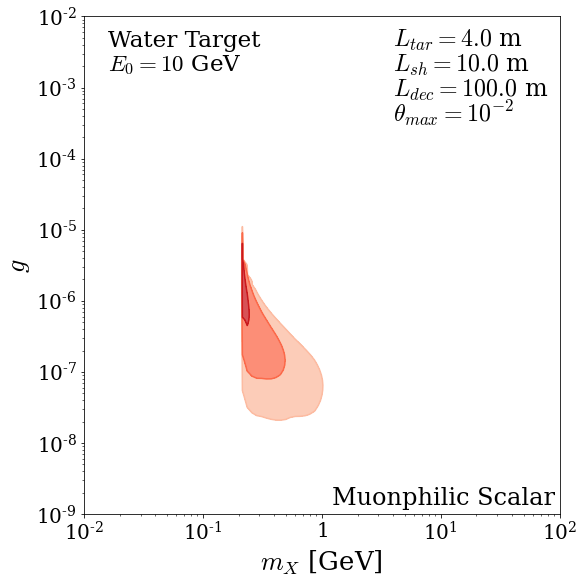

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


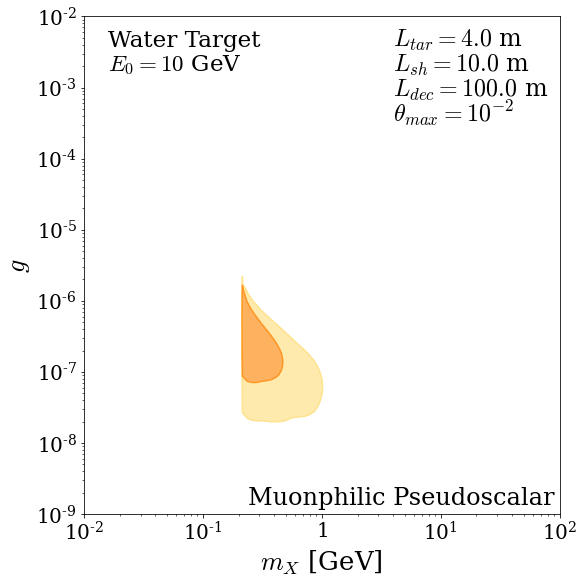

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


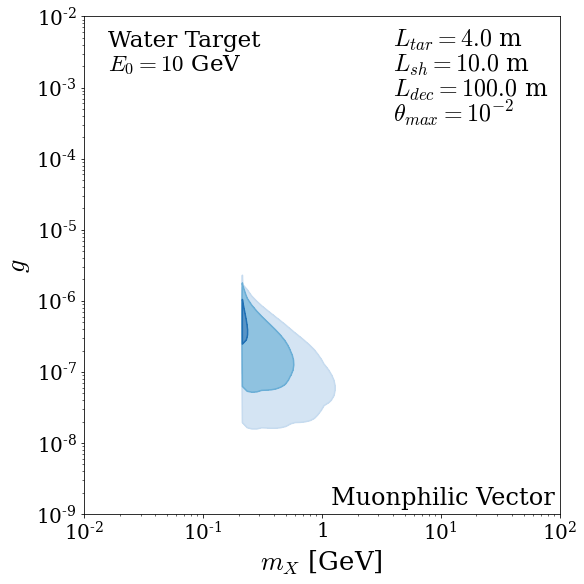

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


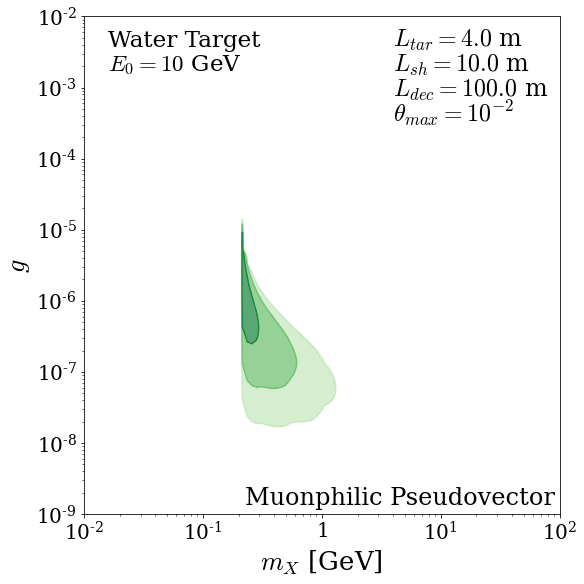

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e63_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 105.71it/s]
1000it [00:06, 147.39it/s]
1000it [00:07, 132.22it/s]
1000it [00:09, 107.44it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


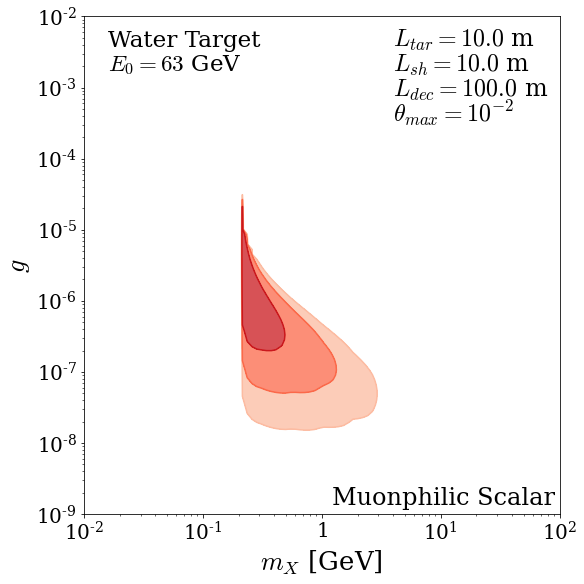

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


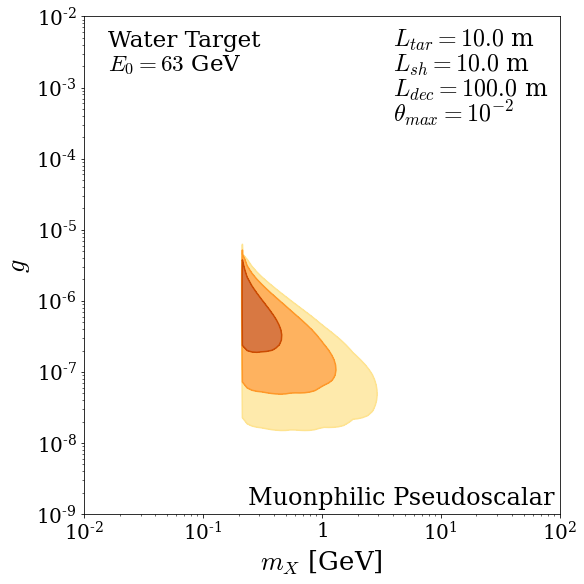

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


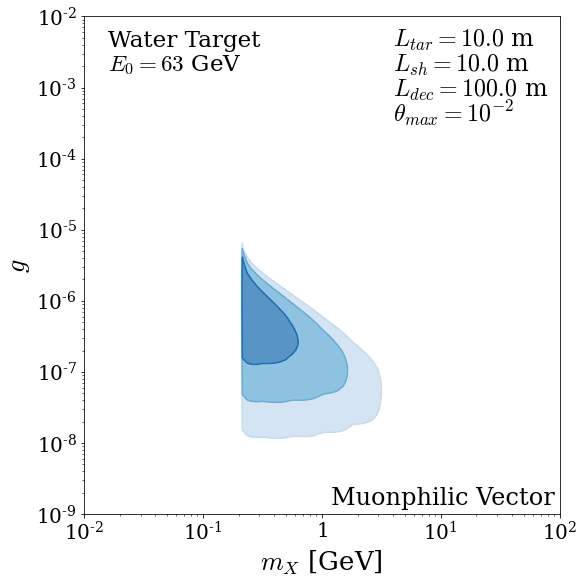

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


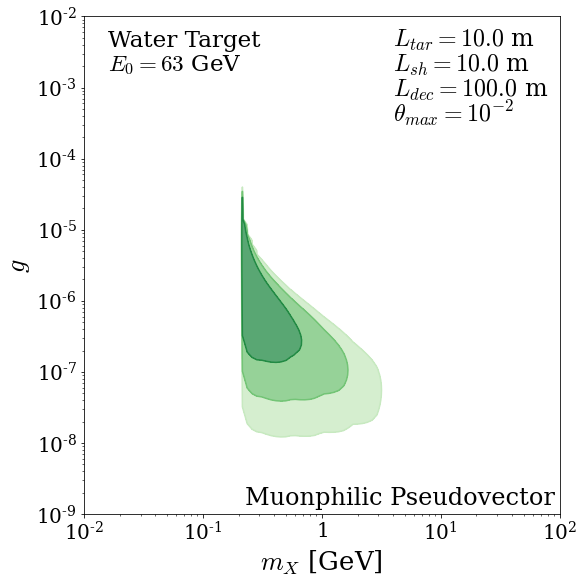

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e1500_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 109.63it/s]
1000it [00:06, 151.26it/s]
1000it [00:07, 132.24it/s]
1000it [00:09, 106.84it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


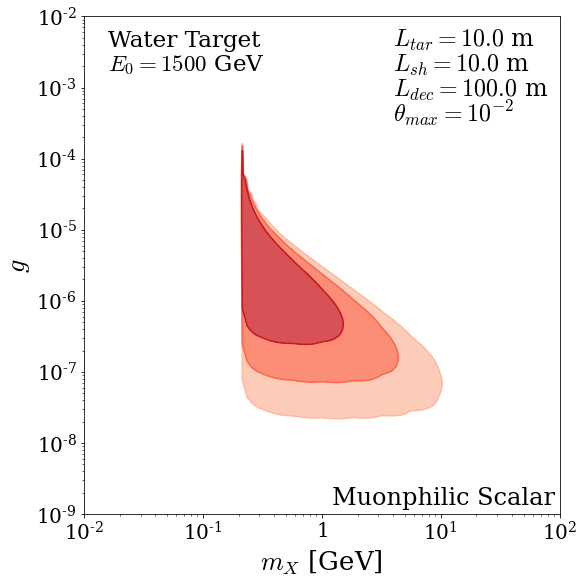

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


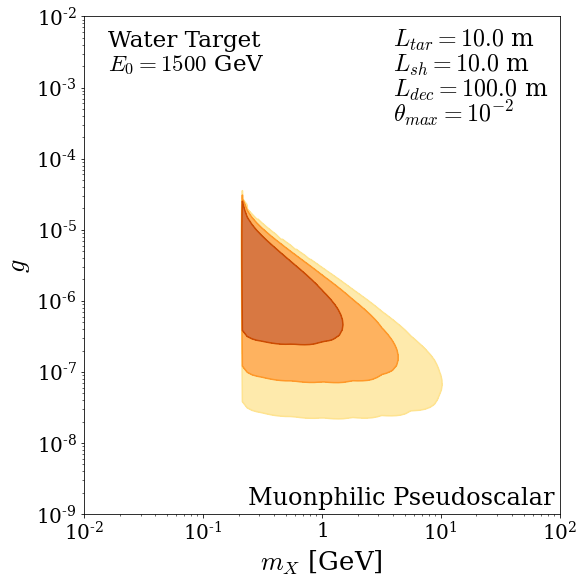

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


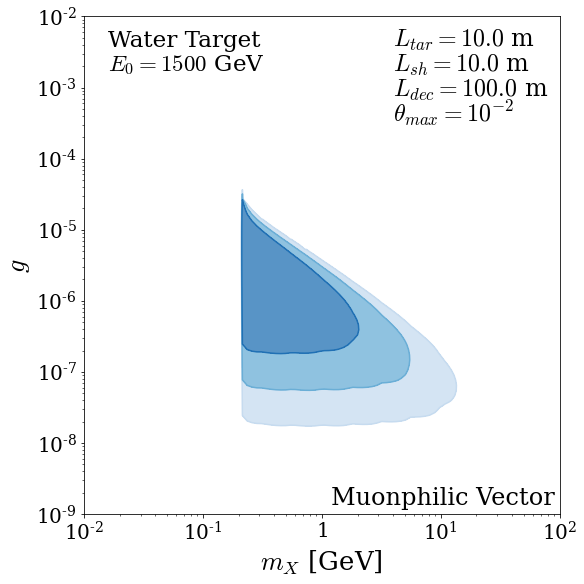

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


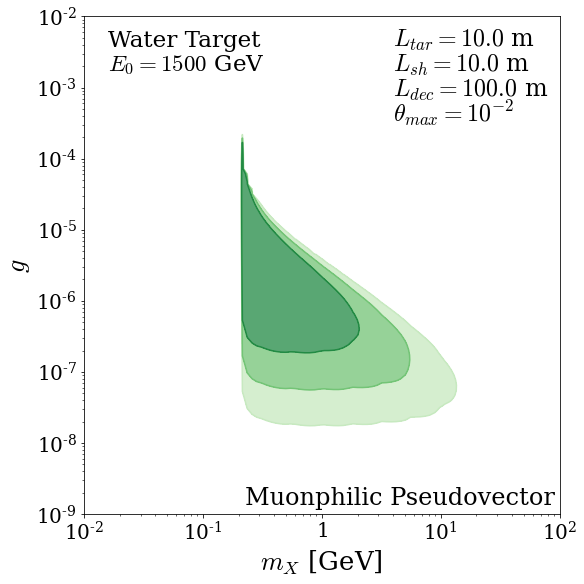

Checking for existing event yield data at experiments/Water/experiment_muonphilic_e5000_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 105.25it/s]
1000it [00:06, 146.80it/s]
1000it [00:07, 128.51it/s]
1000it [00:09, 105.11it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


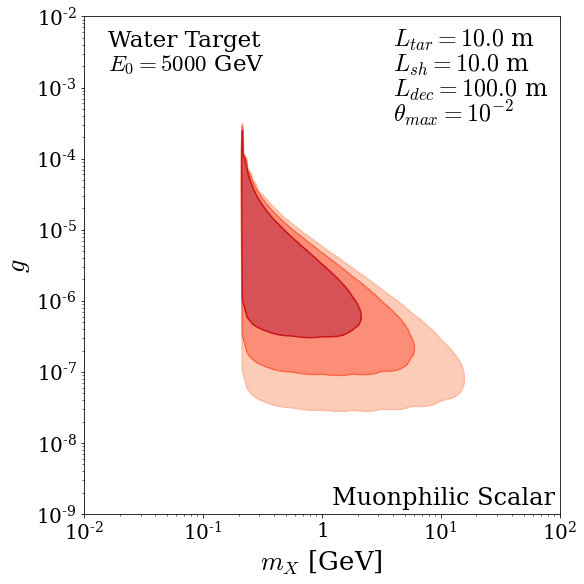

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


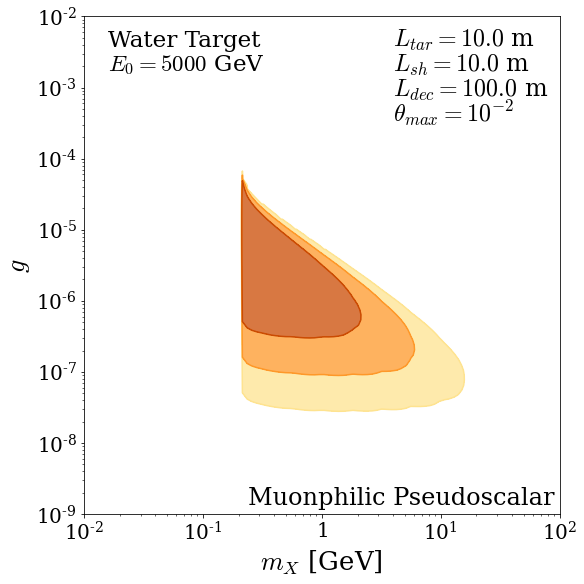

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


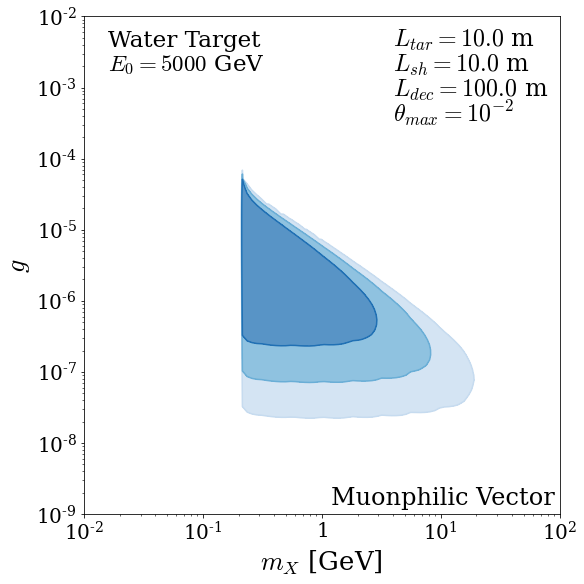

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


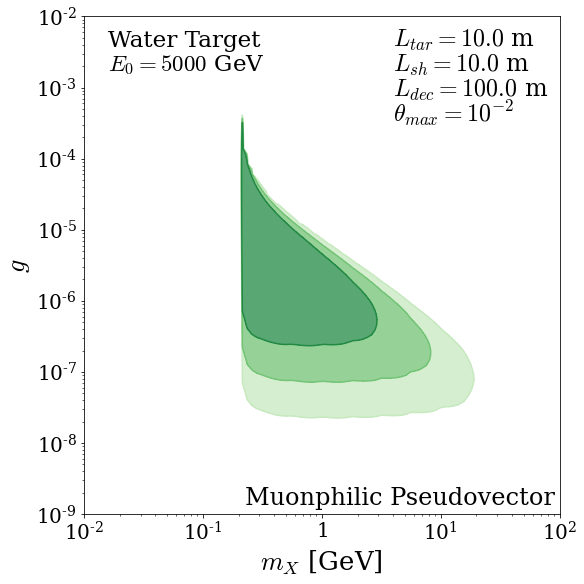

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e10_t0.5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 110.89it/s]
1000it [00:06, 151.92it/s]
1000it [00:07, 132.73it/s]
1000it [00:09, 108.04it/s]


Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


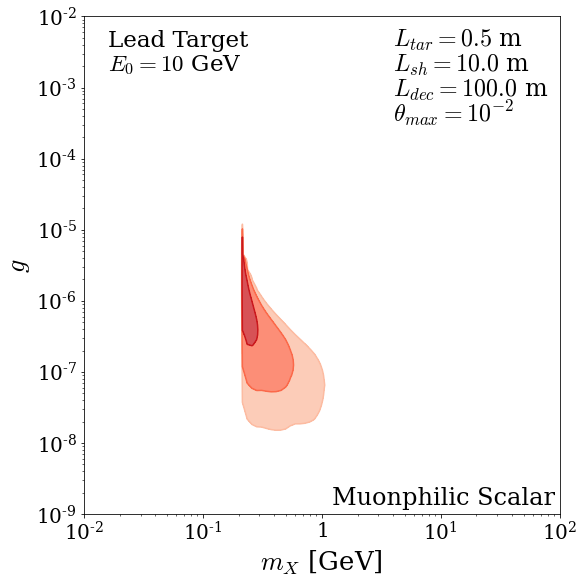

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


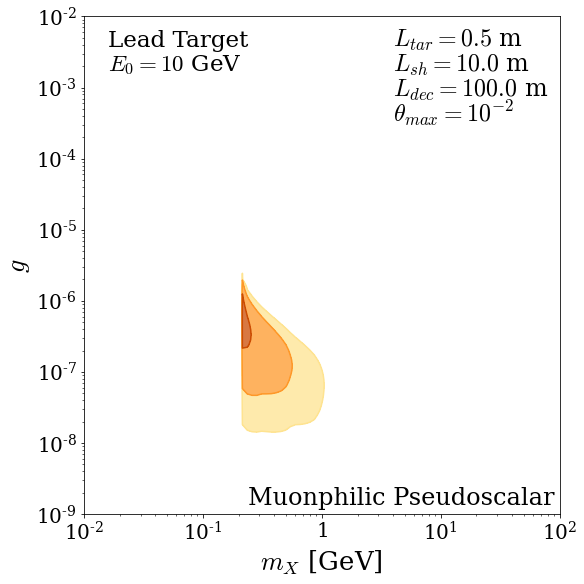

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


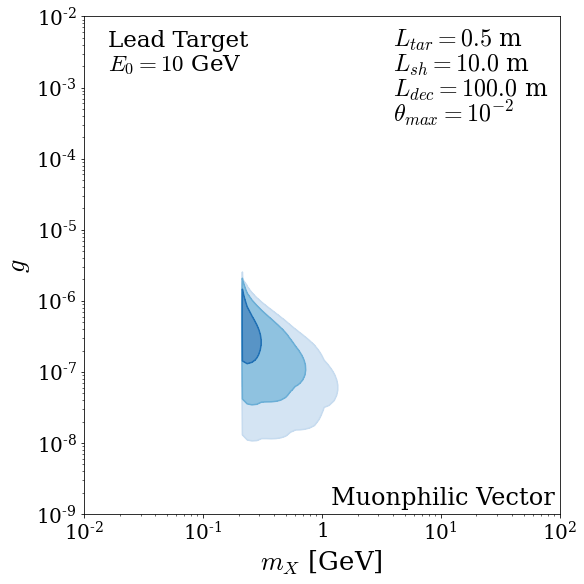

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


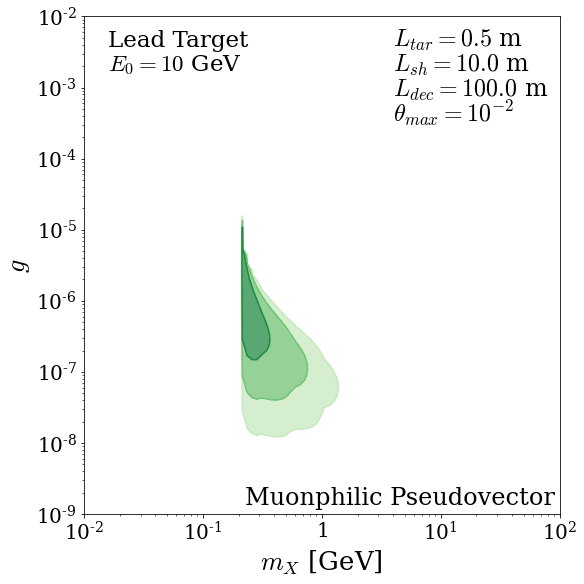

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e63_t2_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 109.97it/s]
1000it [00:06, 151.82it/s]
1000it [00:07, 130.00it/s]
1000it [00:09, 104.30it/s]


Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


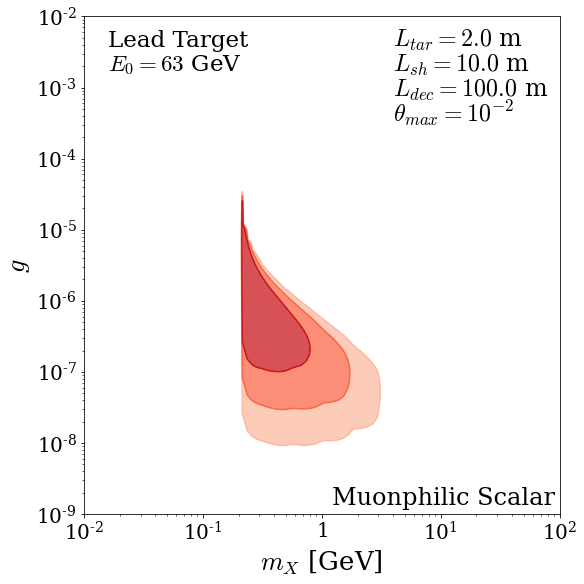

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


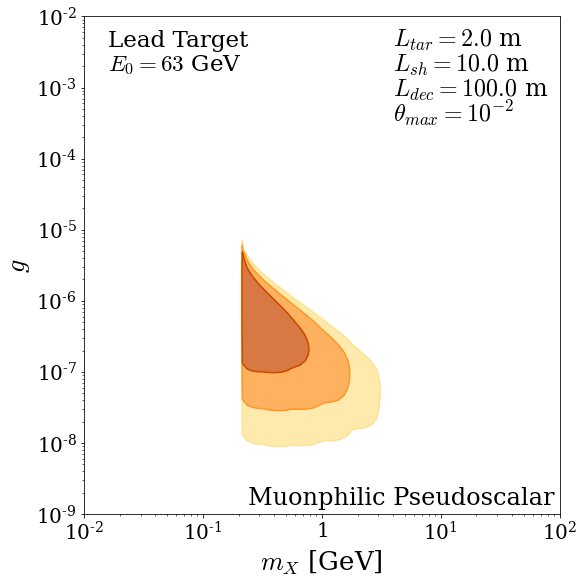

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


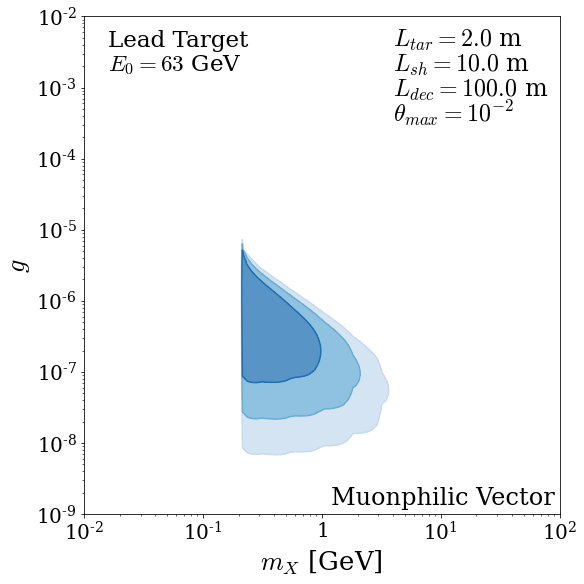

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


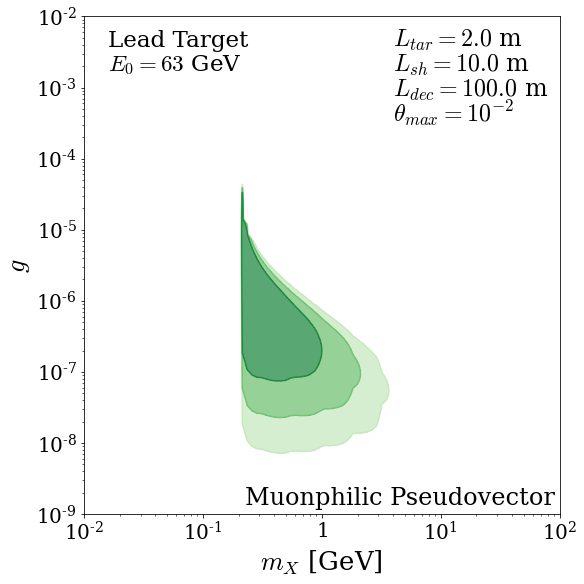

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e1500_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 109.09it/s]
1000it [00:06, 151.17it/s]
1000it [00:07, 132.94it/s]
1000it [00:09, 107.44it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


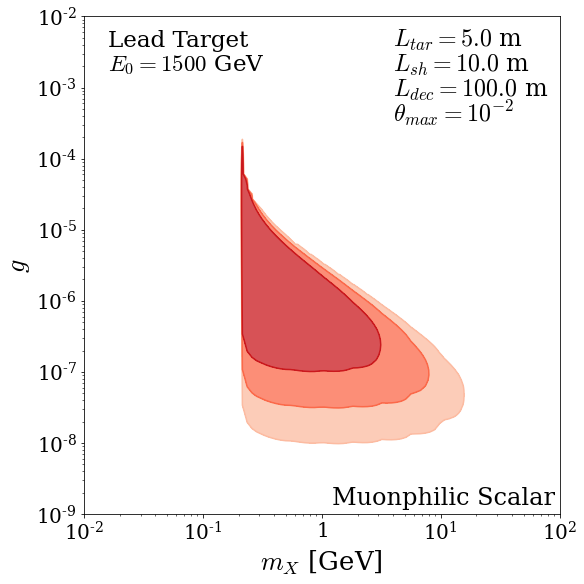

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


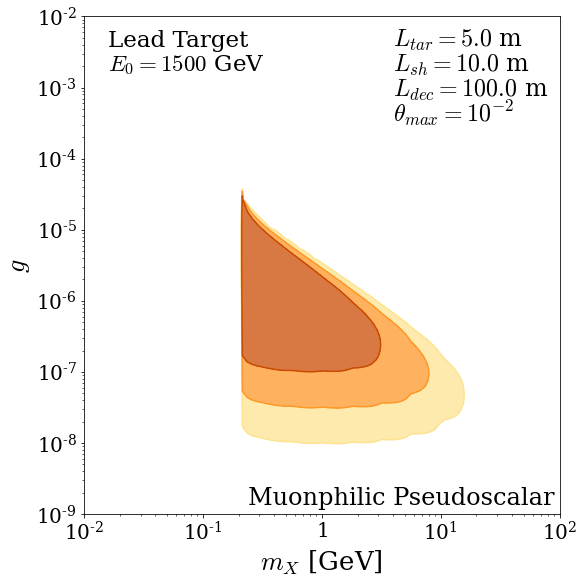

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


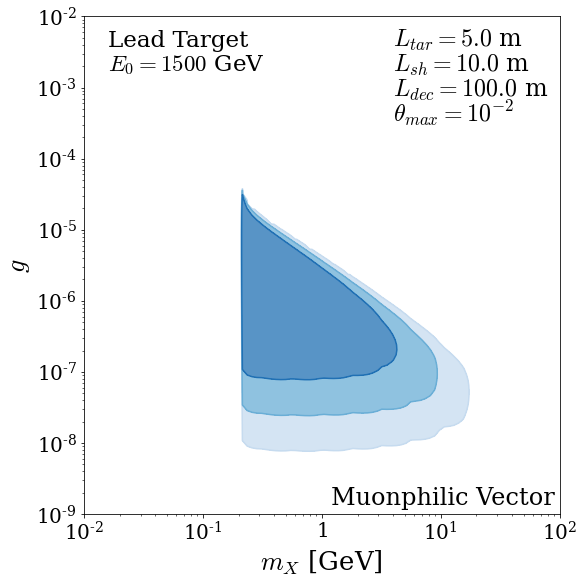

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


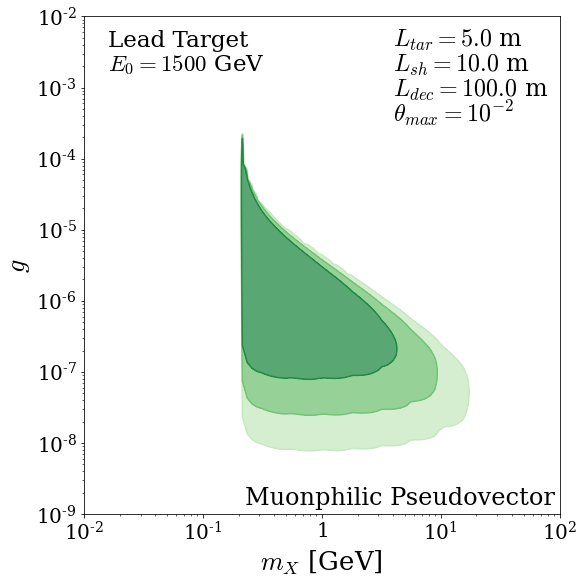

Checking for existing event yield data at experiments/Lead/experiment_muonphilic_e5000_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 108.96it/s]
1000it [00:06, 152.24it/s]
1000it [00:07, 132.32it/s]
1000it [00:09, 108.03it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


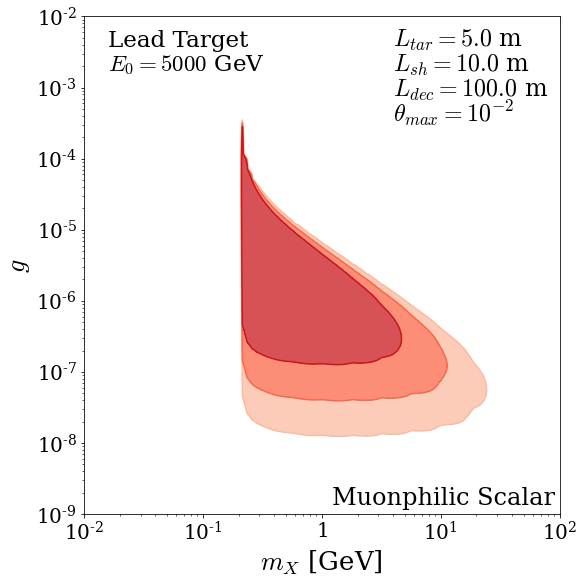

[(0.996078431372549, 0.8892425990003844, 0.5665974625144176, 1.0), (0.9949711649365629, 0.5974778931180315, 0.15949250288350636, 1.0), (0.7952941176470588, 0.2958246828143022, 0.008027681660899655, 1.0)]


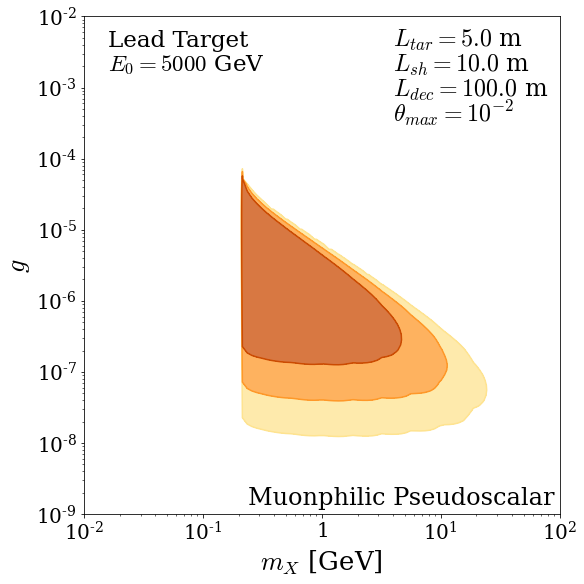

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


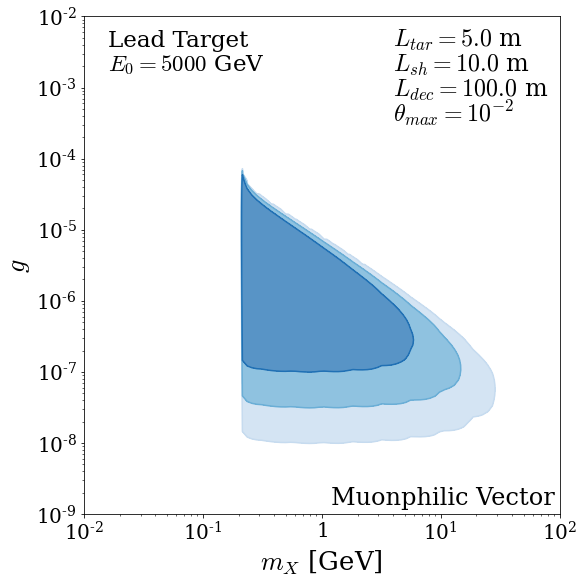

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024, 1.0), (0.45176470588235296, 0.7670895809304115, 0.4612072279892349, 1.0), (0.1340253748558247, 0.5423298731257208, 0.26828143021914647, 1.0)]


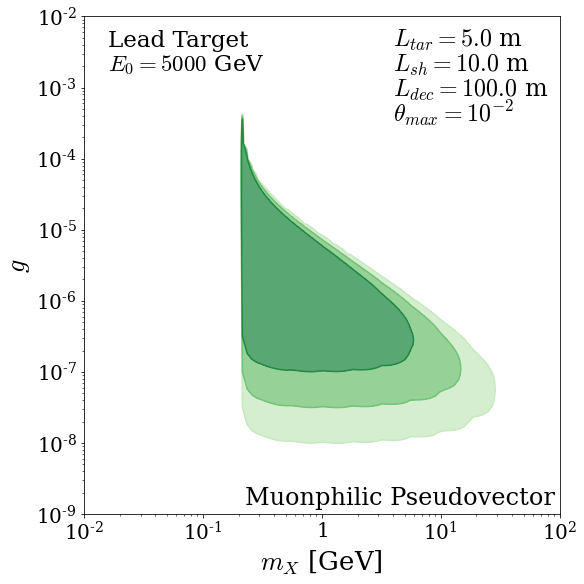

In [140]:
# ########## Muonphilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Scalar", "Pseudoscalar", "Vector", "Axial Vector"]

# Decay Parameters
model_names = {"Scalar" : "Muonphilic Scalar", "Pseudoscalar" : "Muonphilic Pseudoscalar", "Vector" : "Muonphilic Vector", "Axial Vector" : "Muonphilic Pseudovector"}
model_name_string = "muonphilic"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [0, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [0, 1.776, 1],
                    "neutrinos" : [0, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
if run_muonphilic:
    for target in targets:
        for E in E_0s:

            target_name = target
            target_Z = Zs[target]                # Target nucleus's electric charge
            target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
            target_density = rhos[target]           # Target material density [g/cm3]
            target_length = l_T[target][E]          # Length of target [m]

            cross_section_dir = f"experiments/{target_name}/cross_sections/"
            experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

            config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
            calculate_event_yields(config, force_rerun = force_rerun)

            exclusion_plot(config, "Scalar", model_names["Scalar"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Reds",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
            exclusion_plot(config, "Pseudoscalar", model_names["Pseudoscalar"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "YlOrBr",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
            exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
            exclusion_plot(config, "Axial Vector", model_names["Axial Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Greens",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)



# $L_\mu - L_\tau$

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e10_t4_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 132.16it/s]


Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


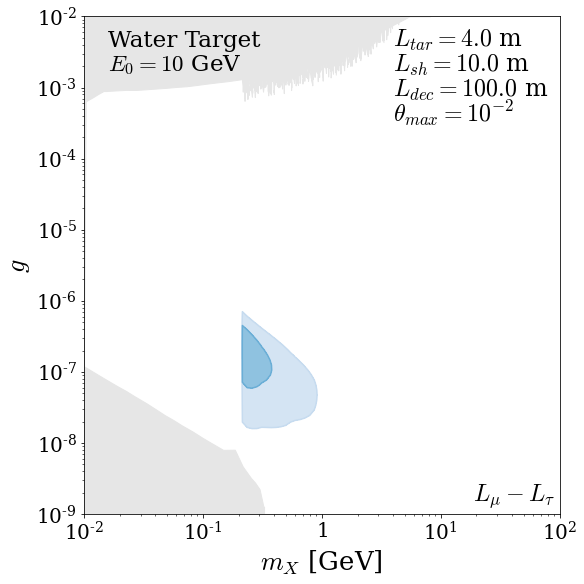

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e63_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 132.49it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


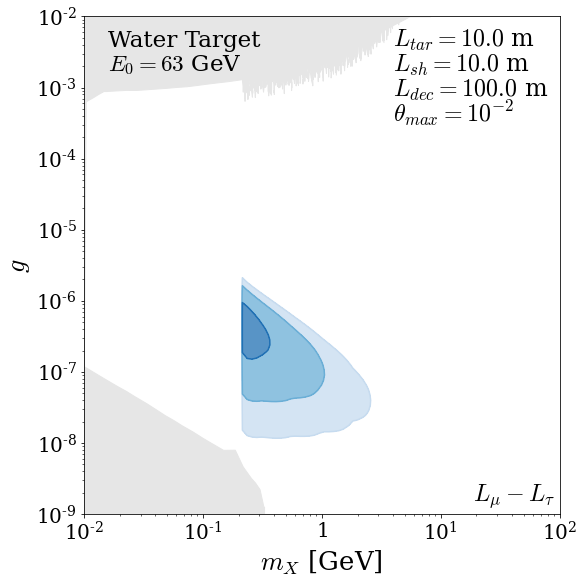

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e1500_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 127.66it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


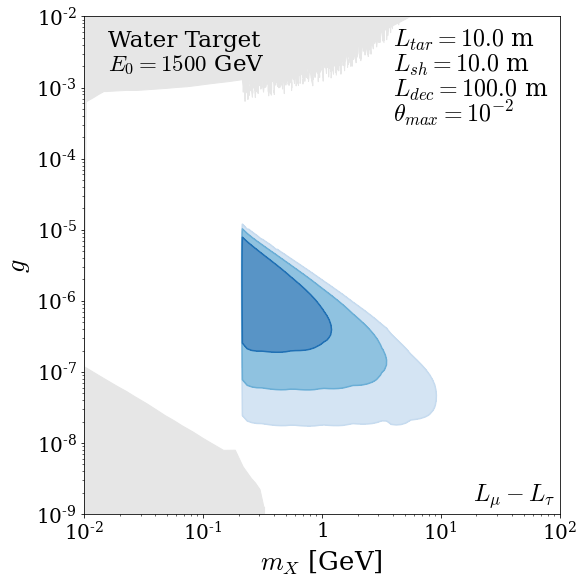

Checking for existing event yield data at experiments/Water/experiment_lmu_minus_ltau_e5000_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 132.44it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


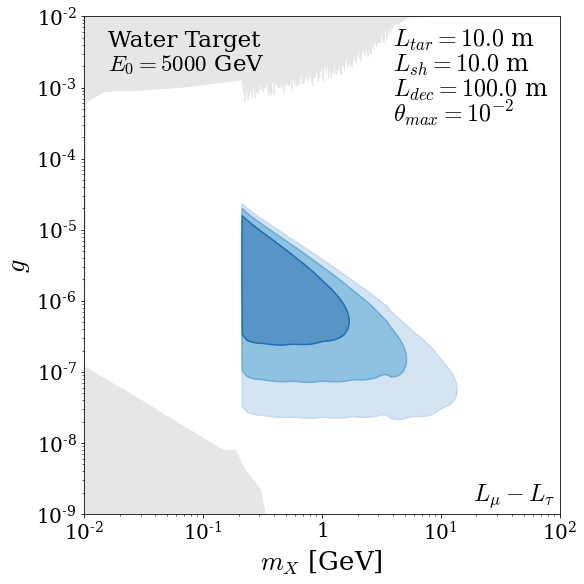

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e10_t0.5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 133.04it/s]


Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


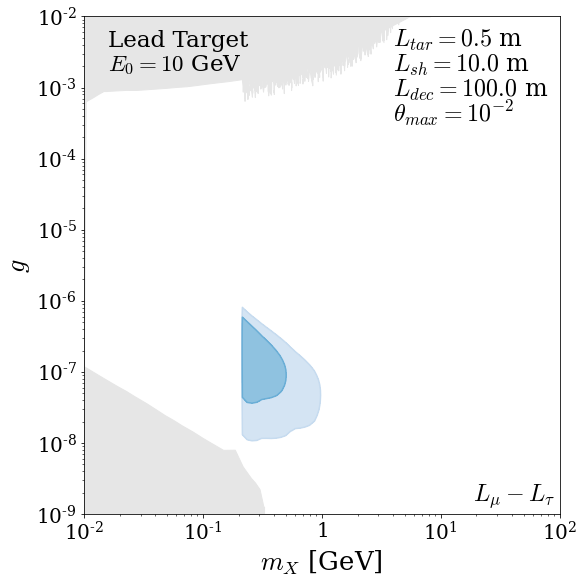

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e63_t2_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 137.07it/s]


Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


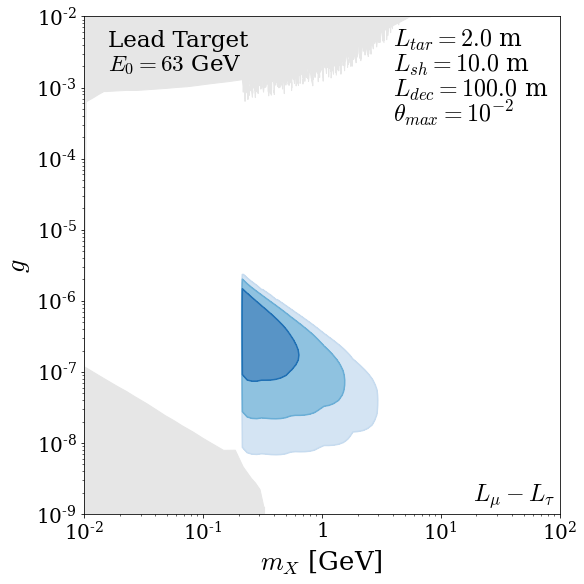

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e1500_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.06it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


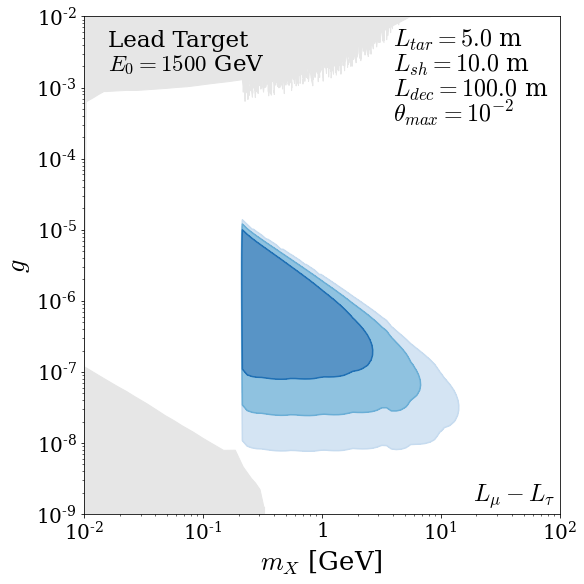

Checking for existing event yield data at experiments/Lead/experiment_lmu_minus_ltau_e5000_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.00it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


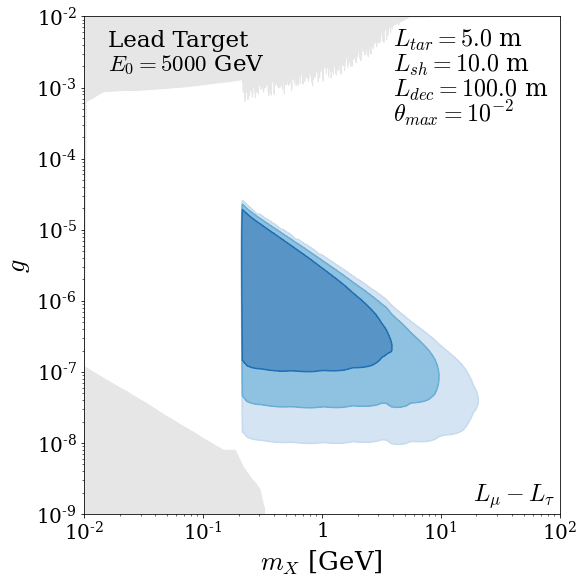

In [141]:
# ########## Lmu-Ltau model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Vector"]

# Decay Parameters
model_names = {"Vector" : r"$L_\mu - L_\tau$",}
model_name_string = "lmu_minus_ltau"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [0, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [1, 1.776, 1],
                    "neutrinos" : [2, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }


# ##### Load data #####

# Searches
lmu_minus_ltau_digitized_dir = "OtherSearchesDigitized/digitized-bounds/lmu-ltau/"

babar_data = read_digitized(lmu_minus_ltau_digitized_dir + "babar-lmu-lta-limit.csv", None, None, firstrow=00)
borexino_data = read_digitized(lmu_minus_ltau_digitized_dir + "borexino-limit.csv", None, None, firstrow=00)
ccfr_1_data = read_digitized(lmu_minus_ltau_digitized_dir + "ccfr-limit.csv", None, None, firstrow=00)
sn1987_data_1 = read_digitized(lmu_minus_ltau_digitized_dir + "sn1987-limit-1.csv", None, None, firstrow=00)
sn1987_data_2 = read_digitized(lmu_minus_ltau_digitized_dir + "sn1987-limit-2.csv", None, None, firstrow=00)
bbn_data = read_digitized(lmu_minus_ltau_digitized_dir + "Neff0p5-line.csv", None, None, firstrow=00)

searches = [babar_data, borexino_data, ccfr_1_data,bbn_data]



# #################################################
# ##### Don't touch below #########################

# Build configs
if run_lmu_minus_ltau:
    for target in targets:
        for E in E_0s:

            target_name = target
            target_Z = Zs[target]                # Target nucleus's electric charge
            target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
            target_density = rhos[target]           # Target material density [g/cm3]
            target_length = l_T[target][E]          # Length of target [m]

            cross_section_dir = f"experiments/{target_name}/cross_sections/"
            experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

            config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
            calculate_event_yields(config, force_rerun = force_rerun)

            # Plot
            fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
            for search in searches:
                plot_grey(ax, config, search)

            ax.fill_between(sn1987_data_1[:,0], sn1987_data_1[:,1], np.interp(sn1987_data_1[:,0], sn1987_data_2[:,0], sn1987_data_2[:,1]), color = (0.9, 0.9, 0.9), zorder = 1)

            
            exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g,
                            newfig= False)
        

# Leptophilic


Checking for existing event yield data at experiments/Water/experiment_leptophilic_e10_t4_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 138.34it/s]


Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


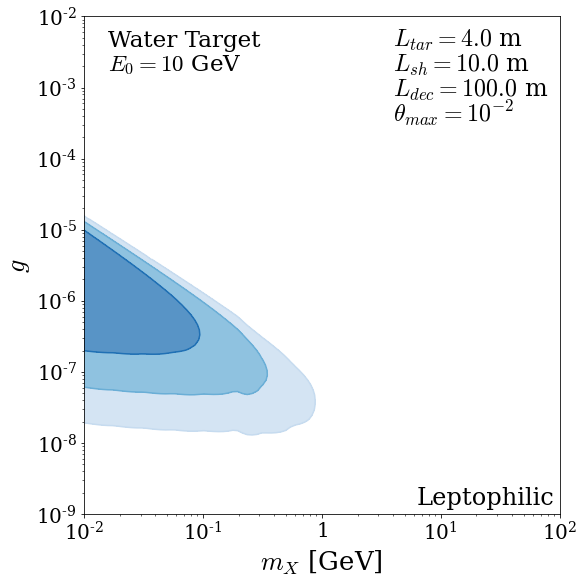

Checking for existing event yield data at experiments/Water/experiment_leptophilic_e63_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.54it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


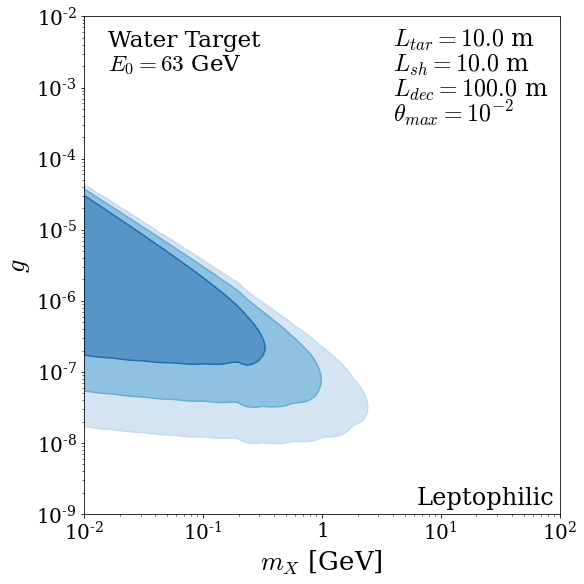

Checking for existing event yield data at experiments/Water/experiment_leptophilic_e1500_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 135.75it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


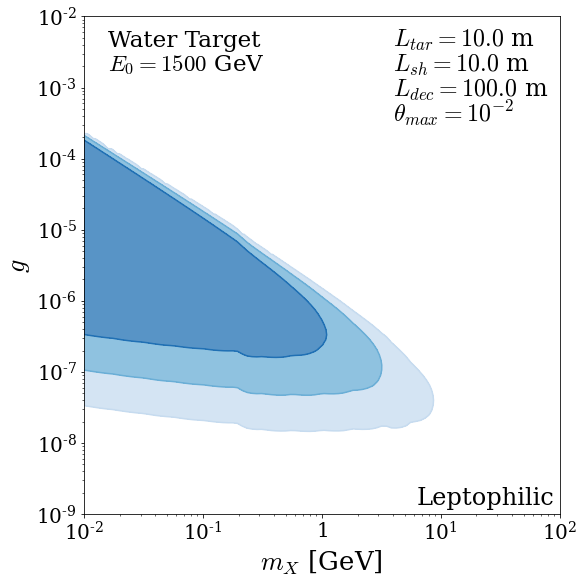

Checking for existing event yield data at experiments/Water/experiment_leptophilic_e5000_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.12it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


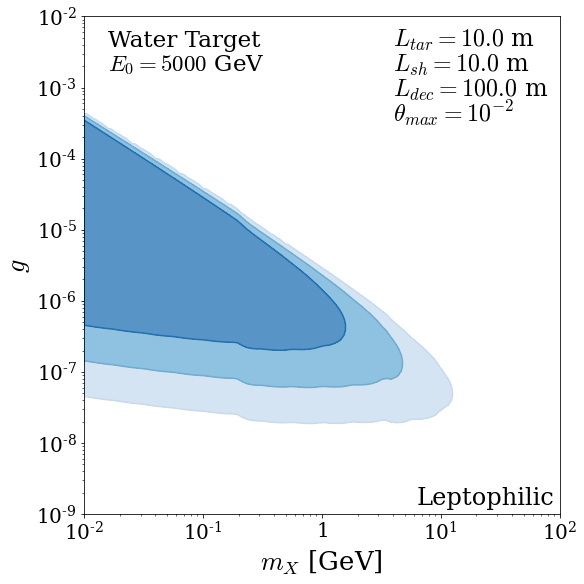

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e10_t0.5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 138.38it/s]


Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


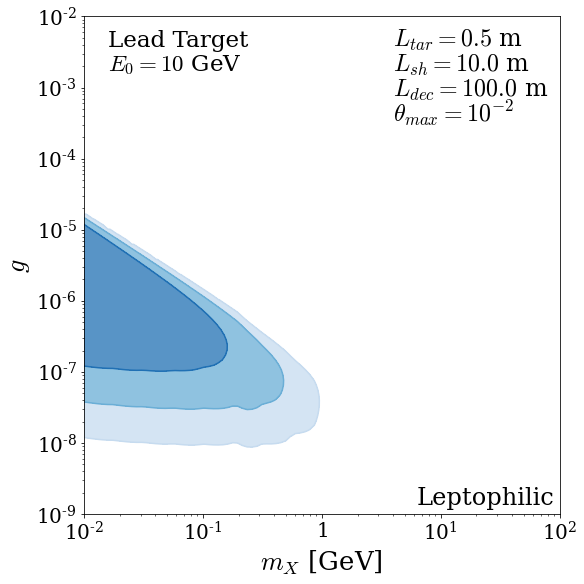

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e63_t2_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.24it/s]


Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


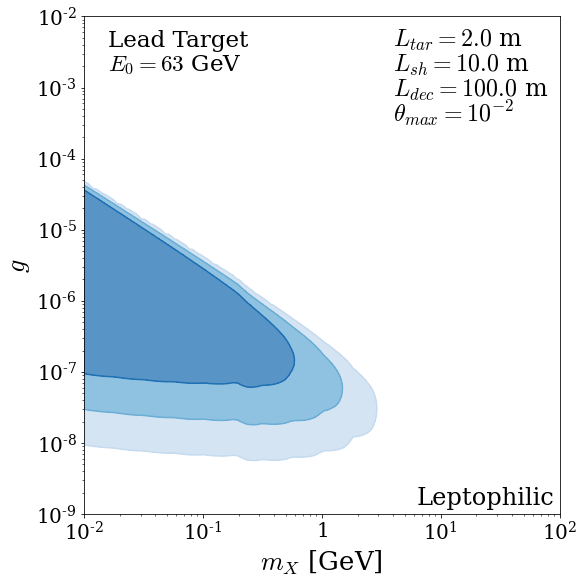

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e1500_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 135.70it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


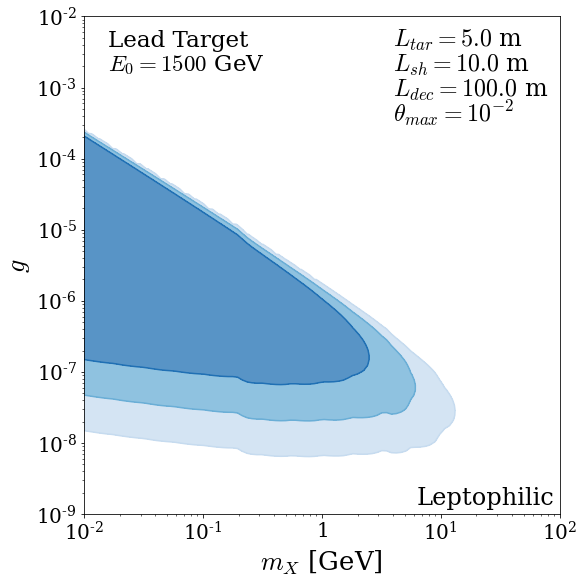

Checking for existing event yield data at experiments/Lead/experiment_leptophilic_e5000_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.40it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


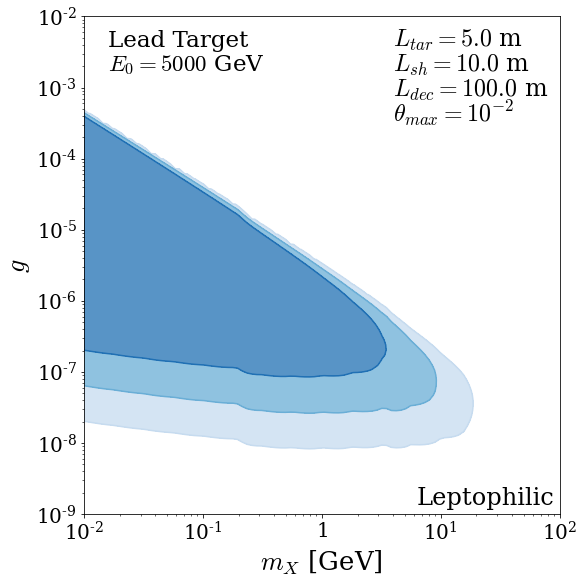

In [142]:
# ########## Leptophilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Vector"]

# Decay Parameters
model_names = {"Vector" : r"Leptophilic",}
model_name_string = "leptophilic"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [1, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [1, 1.776, 1],
                    "neutrinos" : [3, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
if run_leptophilic:
    for target in targets:
        for E in E_0s:

            target_name = target
            target_Z = Zs[target]                # Target nucleus's electric charge
            target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
            target_density = rhos[target]           # Target material density [g/cm3]
            target_length = l_T[target][E]          # Length of target [m]

            cross_section_dir = f"experiments/{target_name}/cross_sections/"
            experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

            config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
            calculate_event_yields(config, force_rerun = force_rerun)

            
            exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g)
        

# Dark Photon

Checking for existing event yield data at experiments/Water/experiment_darkX_e10_t4_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.88it/s]


Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


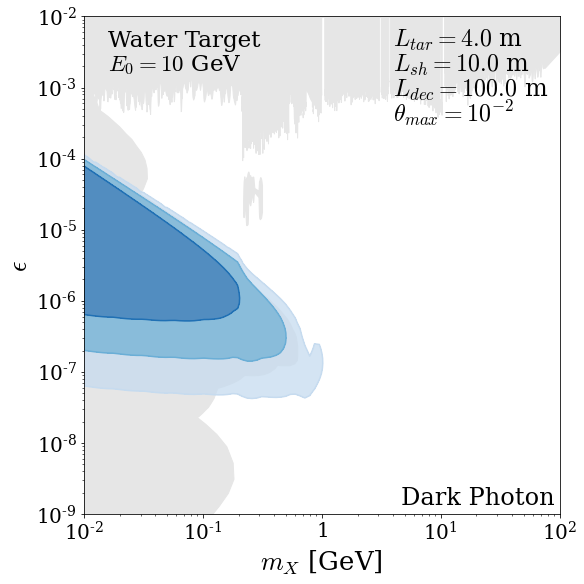

Checking for existing event yield data at experiments/Water/experiment_darkX_e63_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 136.42it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


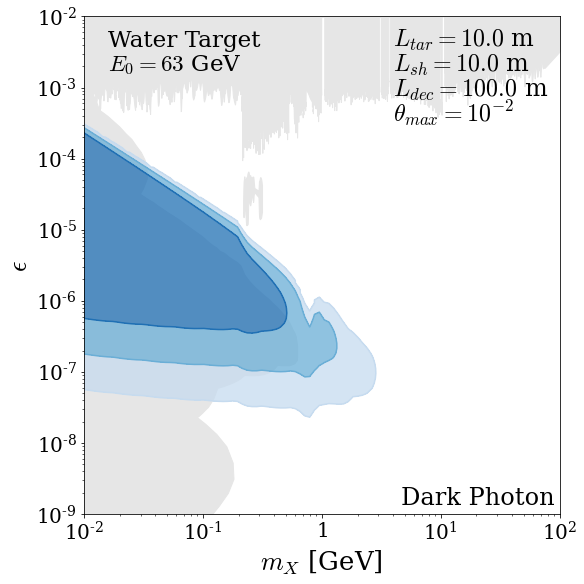

Checking for existing event yield data at experiments/Water/experiment_darkX_e1500_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 129.84it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


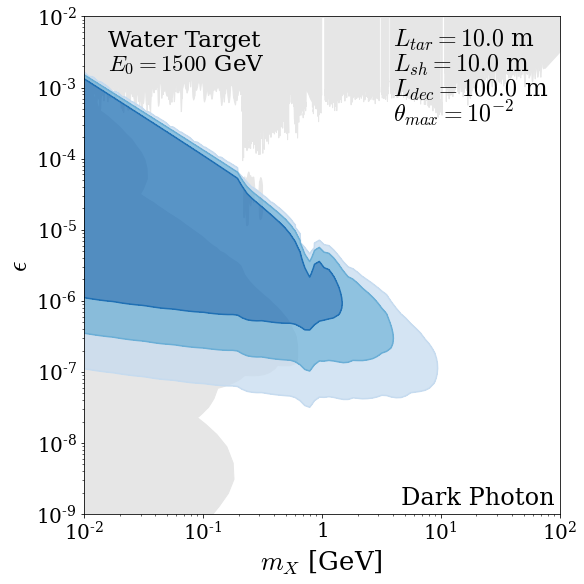

Checking for existing event yield data at experiments/Water/experiment_darkX_e5000_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 130.16it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


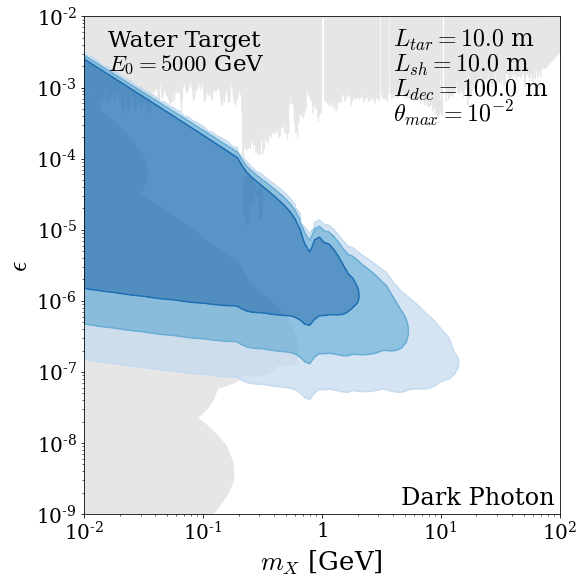

Checking for existing event yield data at experiments/Lead/experiment_darkX_e10_t0.5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 137.05it/s]


Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


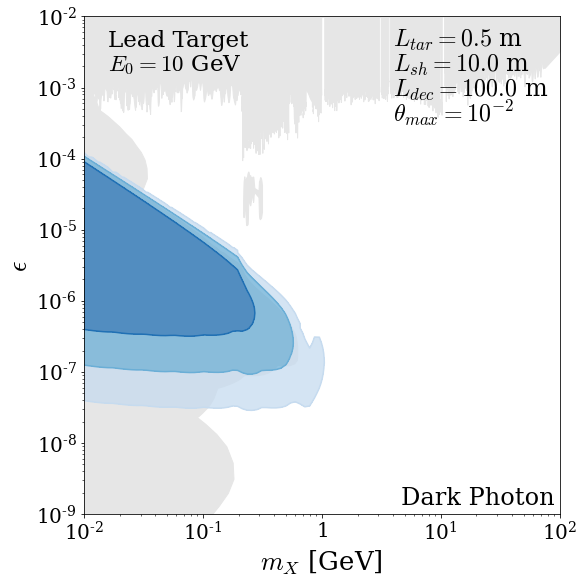

Checking for existing event yield data at experiments/Lead/experiment_darkX_e63_t2_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 135.26it/s]


Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


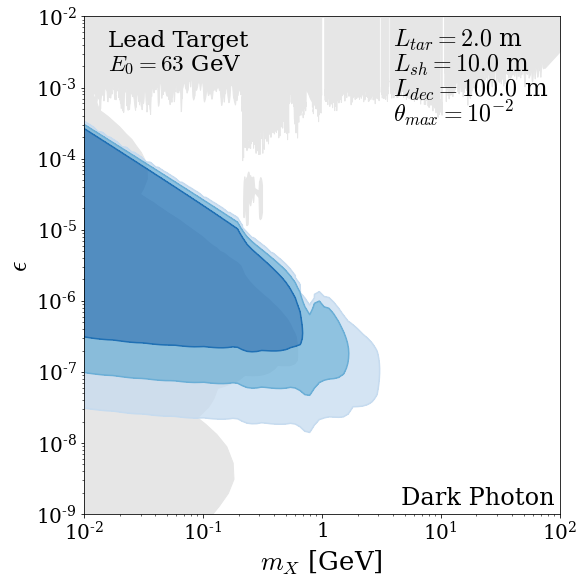

Checking for existing event yield data at experiments/Lead/experiment_darkX_e1500_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 132.05it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


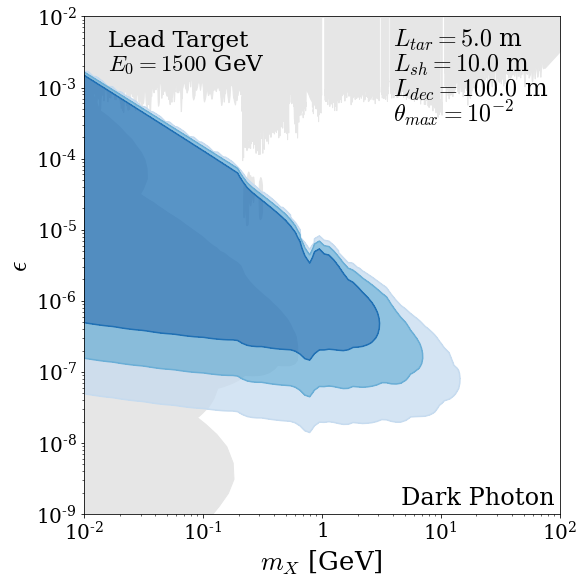

Checking for existing event yield data at experiments/Lead/experiment_darkX_e5000_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:07, 128.51it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897, 1.0), (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0), (0.1271049596309112, 0.4401845444059977, 0.7074971164936563, 1.0)]


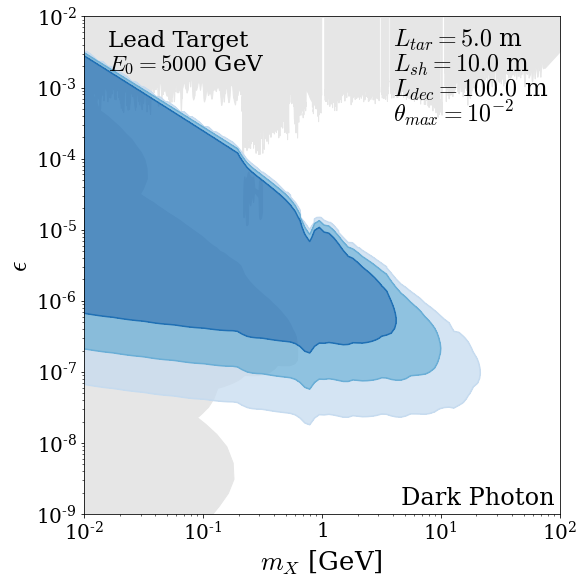

In [143]:
# ########## Leptophilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = True

cases = ["Vector"]

# Decay Parameters
model_names = {"Vector" : r"Dark Photon",}
model_name_string = "darkX"
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [1, 0.000511, 1],
                    "muons" : [1, 0.105, 1],
                    "taus" : [1, 1.776, 1],
                    "neutrinos" : [0, 0, 0],
                    "hadrons" : [1, 0.105, 1], # Weight gets multiplied by Rpp
                    }


# ##### Load data #####

# Resonance Searches
dark_photon_digitized_dir = "OtherSearchesDigitized/digitized-bounds/dark-photon/"
na48_data = read_digitized(dark_photon_digitized_dir + "na48-dark-photon-bounds.csv", MeV_to_GeV, np.sqrt, firstrow=10)
babar_data = read_digitized(dark_photon_digitized_dir + "babar2014PlotG.txt", pow10, pow10, firstrow=00)
mainz_data = read_digitized(dark_photon_digitized_dir + "Mainz2014PlotG.txt", pow10, pow10, firstrow=00)
apex_data = read_digitized(dark_photon_digitized_dir + "Apex2011PlotG.txt", pow10, pow10, firstrow=00)
cms2019_data = read_digitized(dark_photon_digitized_dir + "cms2019-dark-photon-bounds.csv", None, np.sqrt, firstrow=5, lastrow=205)
kloe2016_data = read_digitized(dark_photon_digitized_dir + "kloe2016-dark-photon-bounds.csv", MeV_to_GeV, np.sqrt, firstrow=00)
lhcb_data = read_digitized(dark_photon_digitized_dir + "lhcb2019-prompt-dark-photon-bounds.txt", None, np.sqrt, firstrow=00)

resonances = [na48_data, babar_data, mainz_data, apex_data, cms2019_data, kloe2016_data, lhcb_data]

# Beam Dump Searches
sn1987a_data = read_digitized(dark_photon_digitized_dir + "sn1987-dark-photon-bounds.csv", MeV_to_GeV, None, firstrow=00)
e774_data = read_digitized(dark_photon_digitized_dir + "e774-dark-photon-bounds.csv", None, None, firstrow=00)
e141_data = read_digitized(dark_photon_digitized_dir + "e141-dark-photon-bounds.csv", None, None, firstrow=00)
e137old_data = read_digitized(dark_photon_digitized_dir + "e137-dark-photon-bounds.csv", None, None, firstrow=00)
e137_data = read_digitized(dark_photon_digitized_dir + "e137-updated-dark-photon-bounds.csv", MeV_to_GeV, None, firstrow=00)
charm_data = read_digitized(dark_photon_digitized_dir + "charm-dark-photon-bounds.csv", MeV_to_GeV, None, firstrow=00)
nucal_data = read_digitized(dark_photon_digitized_dir + "nucal-dark-photon-bounds.csv", None, None, firstrow=00)
u70_data = read_digitized(dark_photon_digitized_dir + "u70-dark-photon-bounds.csv", None, None, firstrow=00)

beam_dumps = [sn1987a_data, e774_data, e141_data, e137old_data, e137_data, charm_data, nucal_data, u70_data]

# Future Searches
ship_data = read_digitized(dark_photon_digitized_dir + "ship-dark-photon-bounds.csv", MeV_to_GeV, None, firstrow=00)
awake50_data = read_digitized(dark_photon_digitized_dir + "awake50-dark-photon-bounds.csv", None, None, firstrow=00)
# awake100_data = read_digitized(dark_photon_digitized_dir + "awake100-dark-photon-bounds.csv", None, None, firstrow=00)
belle2_data = read_digitized(dark_photon_digitized_dir + "belle2-dark-photon-bounds.csv", None, None, firstrow=00)
lhcbproj_data_1 = read_digitized(dark_photon_digitized_dir + "lhcb-projected-dark-photon-bounds-1.csv", None, np.sqrt, firstrow=00)
lhcbproj_data_2 = read_digitized(dark_photon_digitized_dir + "lhcb-projected-dark-photon-bounds-2.csv", None, np.sqrt, firstrow=00)
lhcbproj_data_3 = read_digitized(dark_photon_digitized_dir + "lhcb-projected-dark-photon-bounds-3.csv", None, np.sqrt, firstrow=00)
lhcbproj_data = np.concatenate([ lhcbproj_data_1, lhcbproj_data_2])
# lhcbproj_data = lhcbproj_data[lhcbproj_data[:,0].argsort()]

future_projections = [ship_data, awake50_data, belle2_data, lhcbproj_data]
future_projections_colors = ["#6ab547", "#6ea4bf", "#ff7d00", "#fabc2a"]
future_projections_strings = ["SHiP", "AWAKE 50", "LHCb (500 fb$^{-1}$)", "Belle-II"]

# Other (LHCb LLP)
lhcbllp_data_low = read_digitized(dark_photon_digitized_dir + "lhcb2019-long-lived-dark-photon-bounds.txt", MeV_to_GeV, np.sqrt, firstrow=00, usecols=[0,1])
lhcbllp_data_high = read_digitized(dark_photon_digitized_dir + "lhcb2019-long-lived-dark-photon-bounds.txt", MeV_to_GeV, np.sqrt, firstrow=00, usecols=[0,2])


# #################################################
# ##### Don't touch below #########################

# Build configs
if run_dark_photon:
    for target in targets:
        for E in E_0s:

            target_name = target
            target_Z = Zs[target]                # Target nucleus's electric charge
            target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
            target_density = rhos[target]           # Target material density [g/cm3]
            target_length = l_T[target][E]          # Length of target [m]

            cross_section_dir = f"experiments/{target_name}/cross_sections/"
            experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

            config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
            calculate_event_yields(config, force_rerun = force_rerun)


            # Plot
            fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
            for resonance in resonances:
                plot_grey(ax, config, resonance)

            for beam_dump in beam_dumps:
                plot_grey(ax, config, beam_dump)

            # for i in range(len(future_projections)):
            #     plot_projection(ax, config, future_projections[i], future_projections_colors[i], future_projections_strings[i])
    
            ax.fill_between(lhcbllp_data_low[:,0], lhcbllp_data_low[:,1], lhcbllp_data_high[:,1], color = (0.9, 0.9, 0.9), zorder = 1)


            exclusion_plot(config, "Vector", model_names["Vector"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Blues",
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g,
                            newfig = False)
        

# Leptonic Yukawa

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e10_t4_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 109.46it/s]


Event yields for Water with target, shield, detector lengths of 4m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


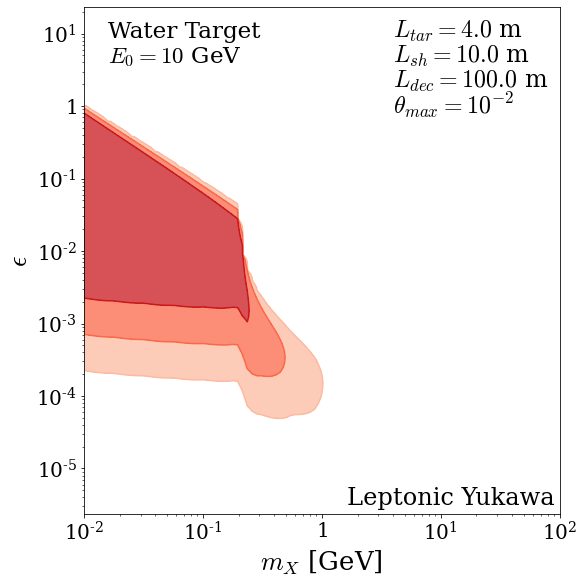

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e63_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:10, 91.86it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


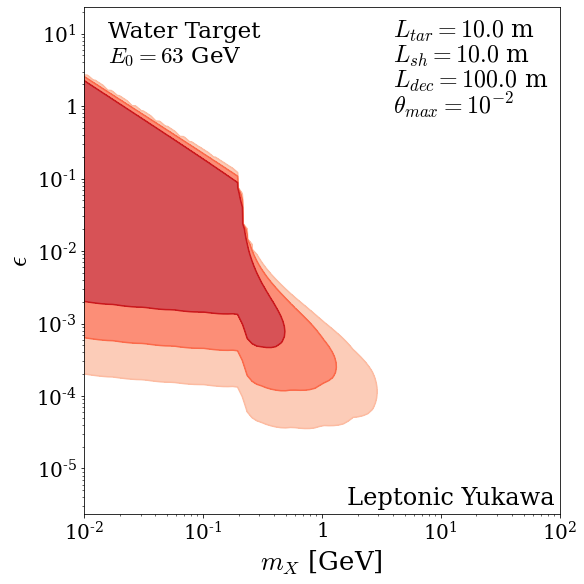

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e1500_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 104.75it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


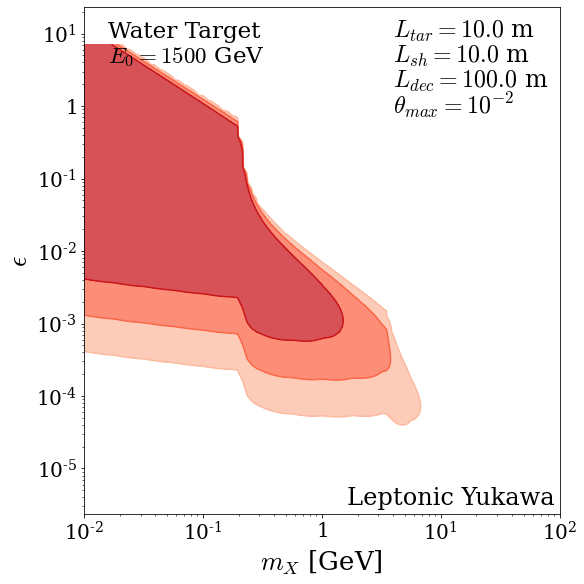

Checking for existing event yield data at experiments/Water/experiment_leptonic_yukawa_e5000_t10_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 102.41it/s]


Event yields for Water with target, shield, detector lengths of 10m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


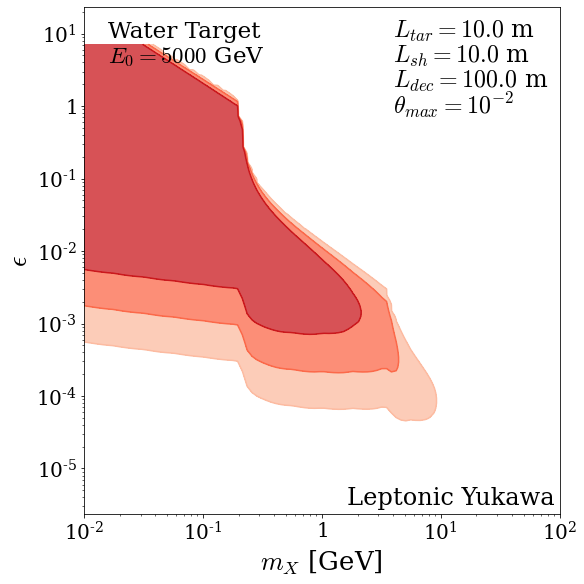

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e10_t0.5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 105.14it/s]


Event yields for Lead with target, shield, detector lengths of 0m, 10m, 100m, at 10 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


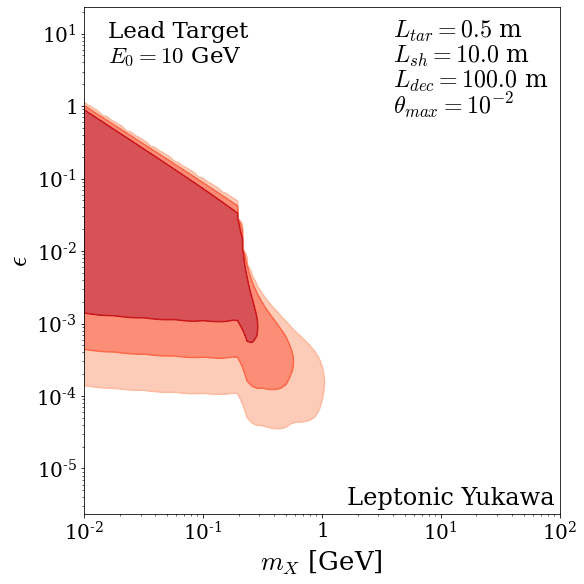

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e63_t2_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 107.40it/s]


Event yields for Lead with target, shield, detector lengths of 2m, 10m, 100m, at 63 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


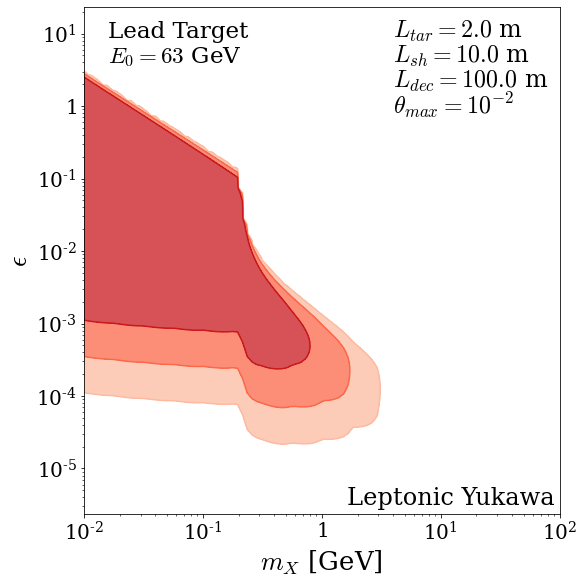

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e1500_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 106.50it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 1500 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


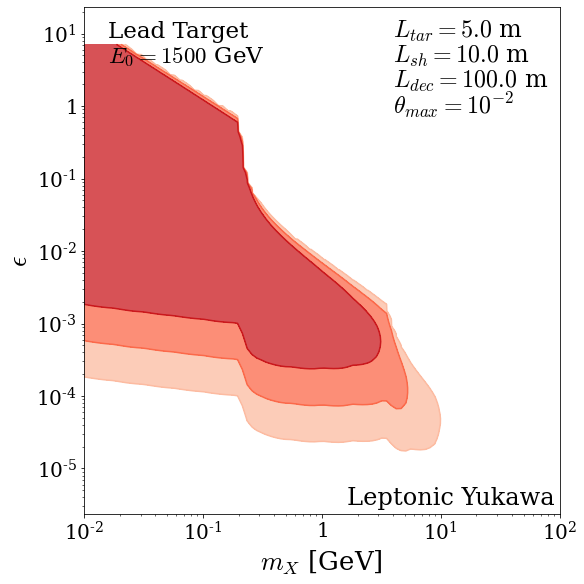

Checking for existing event yield data at experiments/Lead/experiment_leptonic_yukawa_e5000_t5_s10_d100/event_counts.npy ...
Could not find existing event yield data for the specified experiment, calculating now ...


1000it [00:09, 104.49it/s]


Event yields for Lead with target, shield, detector lengths of 5m, 10m, 100m, at 5000 GeV are available!

[(0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0), (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0), (0.7925720876585928, 0.09328719723183392, 0.11298731257208766, 1.0)]


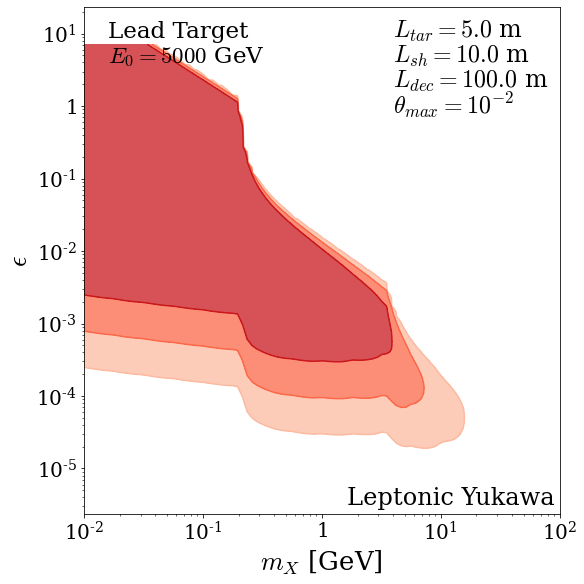

In [149]:
# ########## Leptophilic model parameters ##########
plot_mrange = (-2, 2)
plot_erange = (-9, -2)
epsilon_vs_g = False

cases = ["Scalar"]

# Decay Parameters
model_names = {"Scalar" : r"Leptonic Yukawa",}
model_name_string = "leptonic_yukawa"
vev = 246 # GeV
decay_dictionary = { # Format is [weight, mass, visibility]
                    "electrons" : [0.000511 / 0.105, 0.000511, 1],
                    "muons" : [1.0, 0.105, 1],
                    "taus" : [1.776 / 0.105, 1.776, 1],
                    "neutrinos" : [3 * 0.0 / 0.105, 0, 0],
                    "hadrons" : [0, 0.105, 1], # Weight gets multiplied by Rpp
                    }

# #################################################
# ##### Don't touch below #########################

# Build configs
if run_yukawa:
    for target in targets:
        for E in E_0s:

            target_name = target
            target_Z = Zs[target]                # Target nucleus's electric charge
            target_A = As[target]             # Target atomic mass [g/mol] ~ [GeV]
            target_density = rhos[target]           # Target material density [g/cm3]
            target_length = l_T[target][E]          # Length of target [m]

            cross_section_dir = f"experiments/{target_name}/cross_sections/"
            experiment_dir = f"experiments/{target_name}/experiment_{model_name_string}_e{E}_t{target_length}_s{shield_length}_d{detector_length}/"

            config = build_full_config(E < 100, xbins, cases, m_Xs, cross_section_dir, experiment_dir, E, m_lepton, theta_max, target_name, target_Z, target_A, target_density, target_length, shield_length, detector_length,  model_name_string, decay_dictionary, N_mu, plot_mrange, plot_erange)        
            calculate_event_yields(config, force_rerun = force_rerun)

            
            exclusion_plot(config, "Scalar", model_names["Scalar"], [np.log10(5e-2), np.log10(5), np.log10(5e2)], "Reds",
                            scale_factor= 1.0/(0.105 / vev),
                            labels = [r"$N_{\mu} = 10^{22}$", r"$N_{\mu} = 10^{20}$", r"$N_{\mu} = 10^{18}$"], epsilon_vs_g = epsilon_vs_g,
                            y_string="$\epsilon$")
        